Original Data:
       Time    Oxygen 1     Rate 1  Label Trace     Type              Comment
0       0.0  208.444293    INVALID  Start   All  Restart  Started at:16:26:30
1       0.1  208.468204    INVALID    NaN   NaN      NaN                  NaN
2       0.2  208.492895    INVALID    NaN   NaN      NaN                  NaN
3       0.3  208.536818    INVALID    NaN   NaN      NaN                  NaN
4       0.4  208.602573    INVALID    NaN   NaN      NaN                  NaN
...     ...         ...        ...    ...   ...      ...                  ...
3321  332.1  214.386541  12.780133    NaN   NaN      NaN                  NaN
3322  332.2  214.410452  12.780133    NaN   NaN      NaN                  NaN
3323  332.3  214.433453  12.750454    NaN   NaN      NaN                  NaN
3324  332.4  214.458274  12.750454    NaN   NaN      NaN                  NaN
3325  332.5  214.477896  12.722006   Stop   All     Stop  Stopped at:16:32:03

[3326 rows x 7 columns]

Data Types After Conver

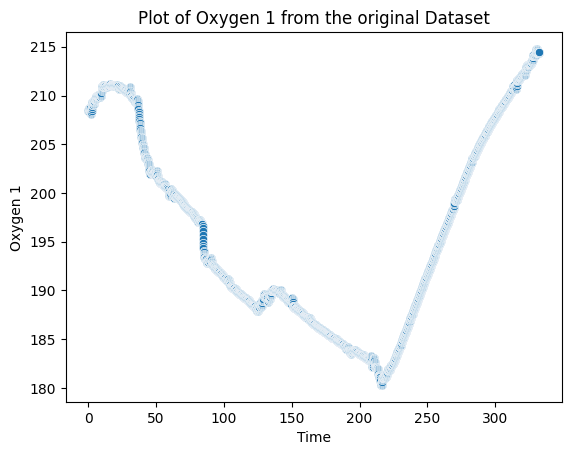

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Path of the file to read
xiao_filepath = "/kaggle/input/xiao-data-v2/221103_2ml-20-20DCBQFECY_6_XW11_with graph.csv"

# Read the file into a variable fifa_data
xiao_data = pd.read_csv(xiao_filepath, delimiter=",")

# Display the original data
print("Original Data:")
print(xiao_data)

# Convert numeric values
columns_to_convert = ["Time","Oxygen 1","Rate 1","Label","Trace","Type","Comment"]

for column in columns_to_convert:
    if xiao_data[column].dtype == 'object':
        xiao_data[column] = pd.to_numeric(xiao_data[column].str.replace(',', '.'), errors='coerce')

# Display the data types after conversion
print("\nData Types After Conversion:")
print(xiao_data.dtypes)

# Plot the data of one of the columns from the new dataset
column_to_plot = columns_to_convert[1]
sns.scatterplot(x=xiao_data["Time"], y=xiao_data[column_to_plot])
plt.title(f"Plot of {column_to_plot} from the original Dataset")
plt.xlabel("Time")
plt.ylabel(column_to_plot)
plt.show()


180.312992
2162

New Dataset (Values from Minimum Onwards):
       Time    Oxygen 1
2162  216.2  180.312992
2163  216.3  180.332875
2164  216.4  180.385894
2165  216.5  180.486086
2166  216.6  180.628642
...     ...         ...
3321  332.1  214.386541
3322  332.2  214.410452
3323  332.3  214.433453
3324  332.4  214.458274
3325  332.5  214.477896

[1164 rows x 2 columns]


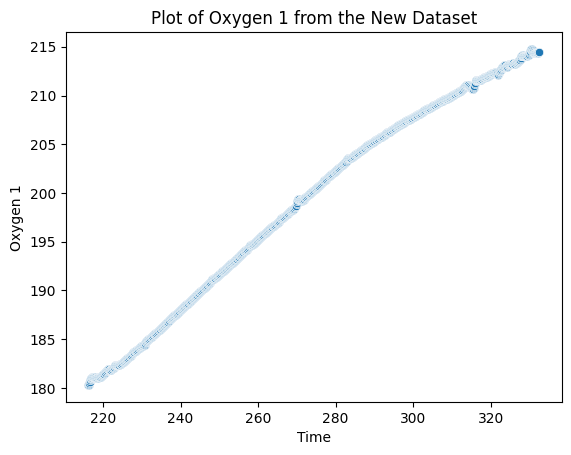

In [2]:
# Find the minimum value in the "Oxygen 1" column
min_oxygen_value = xiao_data["Oxygen 1"].min()
print(min_oxygen_value)
# Find the index of the minimum value in the "Oxygen 1" column
min_oxygen_index = xiao_data["Oxygen 1"].idxmin()
print(min_oxygen_index)
# Create a new dataset starting from the minimum value and keeping only "Time" and "Oxygen 1" columns
new_dataset = xiao_data.loc[min_oxygen_index:, ["Time", "Oxygen 1"]]

# Display the new dataset
print("\nNew Dataset (Values from Minimum Onwards):")
print(new_dataset)

# Plot the data of one of the columns from the new dataset
column_to_plot = columns_to_convert[1]
sns.scatterplot(x=new_dataset["Time"], y=new_dataset[column_to_plot])
plt.title(f"Plot of {column_to_plot} from the New Dataset")
plt.xlabel("Time")
plt.ylabel(column_to_plot)
plt.show()



In [3]:
pip install pwlf


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pwlf: filename=pwlf-2.2.1-py3-none-any.whl size=16601 sha256=83a1e87ef3649967d429685e6986798a66c02fdb87a34bd10e7a3175e4ef8f87
  Stored in directory: /root/.cache/pip/wheels/d9/13/6f/a9201ce279d71065ce782d82418d7c6877be6bb818ae0d1095
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=552dde59e93131a9bd80235d0f0dac5bf69bb2fad58e79de9af3c3e5bc8dc4da
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pwlf pyDOE
Note: you may need to restart the kernel to use updated packages.


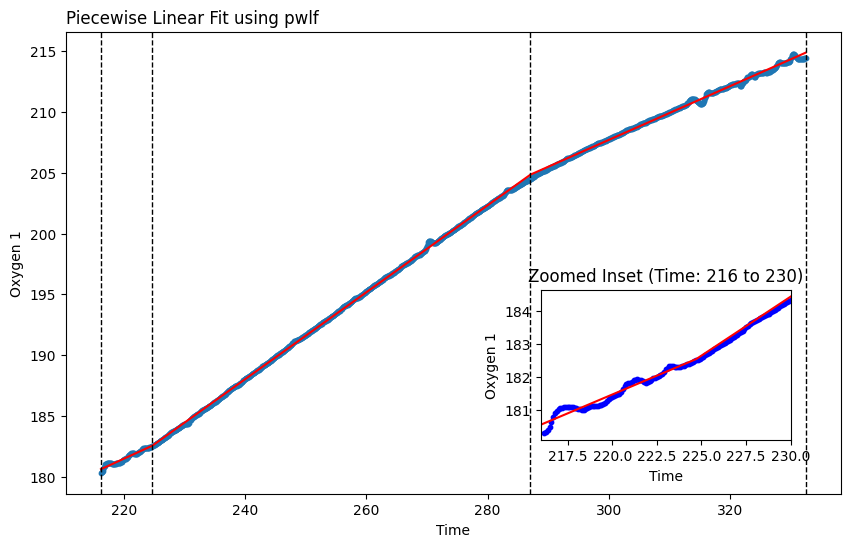

Breakpoints: [216.2        224.69207909 287.03735764 332.5       ]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pwlf import PiecewiseLinFit

# Assuming you have 'new_dataset' with columns 'Time' and 'Oxygen 1'

x = new_dataset['Time'].values
y = new_dataset['Oxygen 1'].values

# Initialize the piecewise linear fit
my_pwlf = PiecewiseLinFit(x, y)

# Fit the data with a specified number of line segments
num_segments = 3  # Adjust the number of segments to your requirement
breakpoints = my_pwlf.fit(num_segments)

# Predict values using the fitted model
x_hat = np.linspace(min(x), max(x), num=1000)
y_hat = my_pwlf.predict(x_hat)

# Create a figure and axes for the main plot
fig, ax = plt.subplots(figsize=(10, 6))  # Larger main plot

# Plotting the original data and fitted piecewise linear function in the main plot
ax.scatter(x, y, label='Original Data', s=10)
ax.plot(x_hat, y_hat, color='red', label='_nolegend_')  # '_nolegend_' to exclude from legend
ax.set_xlabel('Time')
ax.set_ylabel('Oxygen 1')
ax.set_title('Piecewise Linear Fit using pwlf', loc='left')  # Title in the top left corner
# ax.legend()

# Plotting vertical lines at all breakpoints in the main plot
for bp in breakpoints:
    ax.axvline(x=bp, color='black', linestyle='--', linewidth=1)

# Inset plot for the specified time range
inset_ax = fig.add_axes([0.6, 0.2, 0.25, 0.25])  # Adjust position and size of inset
inset_ax.set_title('Zoomed Inset (Time: 216 to 230)')

# Setting the x-axis limit to the specified time range
time_range = [216, 230]
inset_ax.set_xlim(time_range)

# Extracting data within the specified time range
time_mask = (x >= time_range[0]) & (x <= time_range[1])
x_inset = x[time_mask]
y_inset = y[time_mask]

# Predict values using the fitted model
x_hat_inset = np.linspace(time_range[0], time_range[1], num=1000)
y_hat_inset = my_pwlf.predict(x_hat_inset)

# Plotting the zoomed-in data within the inset
inset_ax.scatter(x_inset, y_inset, label='Zoomed Data', s=10, color='blue')
inset_ax.plot(x_hat_inset, y_hat_inset, color='red', label='Piecewise Linear Fit')
inset_ax.set_xlabel('Time')
inset_ax.set_ylabel('Oxygen 1')
# inset_ax.legend()

plt.show()

# Display the breakpoints of the piecewise linear function
print('Breakpoints:', breakpoints)


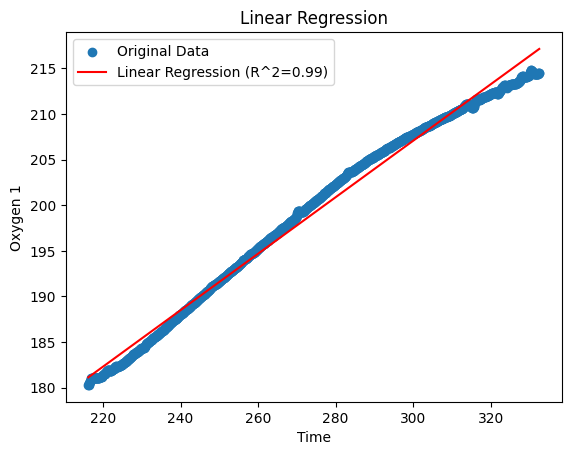

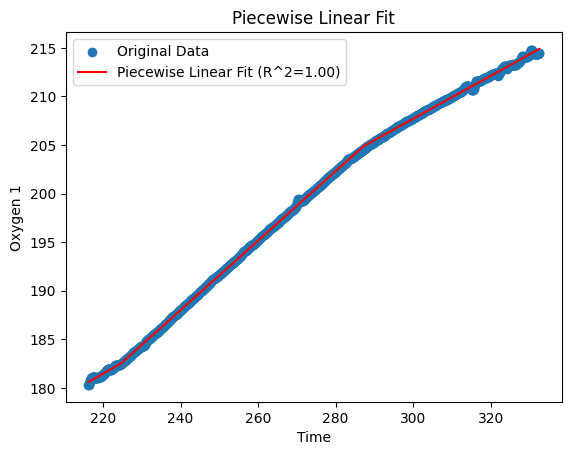

Breakpoints: [216.2        224.69210004 287.03735584 332.5       ]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pwlf import PiecewiseLinFit

# Assuming you have 'new_dataset' with columns 'Time' and 'Oxygen 1'

x = new_dataset['Time'].values
y = new_dataset['Oxygen 1'].values

# Linear Regression
slope, intercept, r_value, _, _ = linregress(x, y)
y_lin_reg = slope * x + intercept
r2_lin_reg = r_value**2

# Piecewise Linear Fit
my_pwlf = PiecewiseLinFit(x, y)
num_segments = 3  # You can adjust this value to change the number of segments
breakpoints = my_pwlf.fit(num_segments)

x_hat = np.linspace(min(x), max(x), num=1000)
y_hat_pwlf = my_pwlf.predict(x_hat)
r2_pwlf = my_pwlf.r_squared()

# Plotting linear regression
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_lin_reg, color='red', label=f'Linear Regression (R^2={r2_lin_reg:.2f})')
plt.xlabel('Time')
plt.ylabel('Oxygen 1')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Plotting piecewise linear fit
plt.scatter(x, y, label='Original Data')
plt.plot(x_hat, y_hat_pwlf, color='red', label=f'Piecewise Linear Fit (R^2={r2_pwlf:.2f})')
plt.xlabel('Time')
plt.ylabel('Oxygen 1')
plt.title('Piecewise Linear Fit')
plt.legend()
plt.show()

# Display the breakpoints of the piecewise linear function
print('Breakpoints:', breakpoints)


In [6]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
from prettytable import PrettyTable
from scipy.stats import linregress
from pwlf import PiecewiseLinFit

# Assuming you have 'new_dataset' with columns 'Time' and 'Oxygen 1'

x = new_dataset['Time'].values
y = new_dataset['Oxygen 1'].values

# Linear Regression
slope_lin_reg, intercept_lin_reg, r_value, _, _ = linregress(x, y)
r2_lin_reg = r_value**2

# Piecewise Linear Fit
my_pwlf = PiecewiseLinFit(x, y)
num_segments = 3  # You can adjust this value to change the number of segments
breakpoints = my_pwlf.fit(num_segments)

r2_pwlf = my_pwlf.r_squared()
slopes_pwlf = my_pwlf.calc_slopes()

# Create a PrettyTable to display the results
comparison_table = PrettyTable()
comparison_table.field_names = ["Metrics", "Linear Regression", "Piecewise Linear Fit"]
comparison_table.add_row(["R^2", f"{r2_lin_reg:.7f}", f"{r2_pwlf:.7f}"])
comparison_table.add_row(["Slope/Breakpoints", f"{slope_lin_reg:.5f}", f"{slopes_pwlf}"])

print(comparison_table)


+-------------------+-------------------+------------------------------------+
|      Metrics      | Linear Regression |        Piecewise Linear Fit        |
+-------------------+-------------------+------------------------------------+
|        R^2        |     0.9901969     |             0.9998537              |
| Slope/Breakpoints |      0.30932      | [0.22817886 0.35766094 0.22097301] |
+-------------------+-------------------+------------------------------------+
